In [1]:
from classy import Class
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rcpresentation
import os

In [ ]:
notebook_folder = os.path.dirname('')
data_folder = os.path.join(notebook_folder, "..", "Data")
def data_path(dat_id):
    return os.path.join(data_folder, dat_id)
def save_file(dat_id,df):
    df.to_csv(data_path(dat_id), index=False)

In [4]:
LambdaCDM = Class()
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842,'N_ncdm':1, 'm_ncdm':0.06})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
# lancio la classe
LambdaCDM.compute()

PK = []
K = [] 

kk = np.logspace(-3, np.log10(3), 1000)
Pk = []
h = LambdaCDM.h()
for k in kk:
    Pk.append(LambdaCDM.pk(k * h, 0.))
K.extend(kk)
PK.extend(Pk)



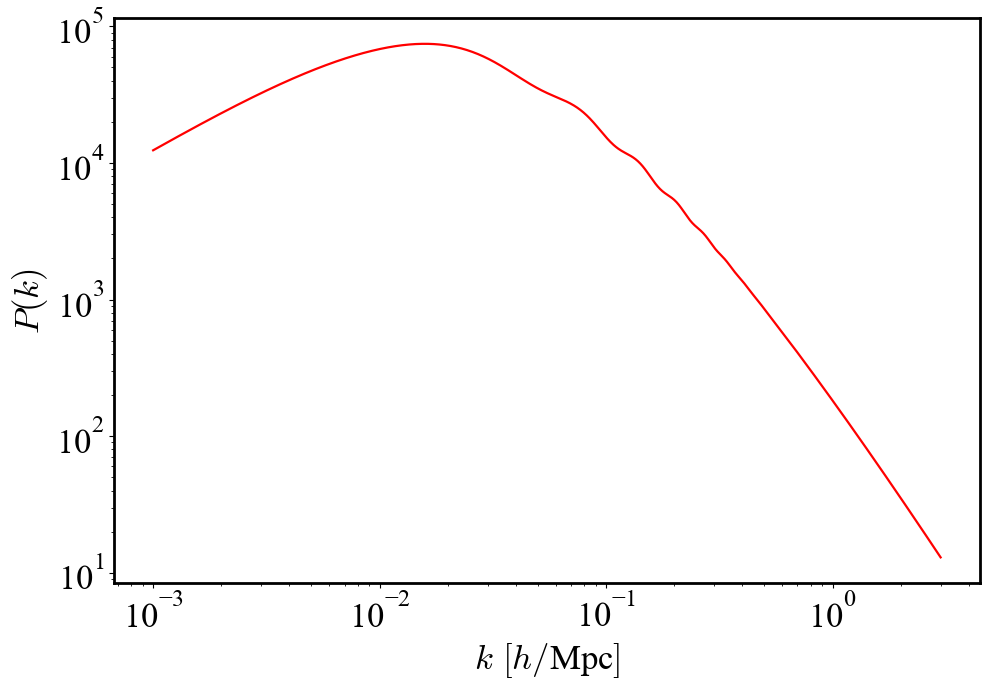

In [11]:
plt.loglog(kk,Pk, color='r')
plt.xlabel('$k \ [h/$Mpc$]$')
plt.ylabel('$P(k)$')
plt.tight_layout()
plt.savefig('PK1.pdf')

----
## Vario omega_b
----

In [32]:
# valore vero 0.0223828
omega_b_arr = np.arange(0.0073828,0.0423828, 0.005)
l = len(omega_b_arr)
omega_b_arr = [round(num, 7) for num in omega_b_arr]

In [33]:
LambdaCDM_arr = []
# creo il modello Lambda-CDM e imposto i parametri di input
for i in range (l):
    LambdaCDM = Class()
    LambdaCDM.set({'omega_b':omega_b_arr[i],'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842,'N_ncdm':1, 'm_ncdm':0.06})
    LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
    # lancio la classe
    LambdaCDM.compute()
    LambdaCDM_arr.append(LambdaCDM)

In [34]:
import pandas as pd

In [35]:
PK = []
K = [] 
for i in range(len(omega_b_arr)):
    if i >= l:
        break  # Esce dal ciclo dopo il settimo plot
    kk = np.logspace(-3, np.log10(3), 1000)
    Pk = []
    h = LambdaCDM_arr[i].h()
    for k in kk:
        Pk.append(LambdaCDM_arr[i].pk(k * h, 0.)/LambdaCDM_arr[0].pk(k * h, 0.))
    K.extend(kk)
    PK.extend(Pk)
df = pd.DataFrame({'k': K, 'P_k_om_b': PK })
save_file('PK_O_B.csv',df)

----
## Vario omega_c
----

In [14]:
# valore vero 0.1201075
omega_c_arr = np.arange(0.0601075,0.2001075,0.02)
l = len(omega_c_arr)
omega_c_arr = [round(num, 7) for num in omega_c_arr]

In [15]:
LambdaCDM_arr = []
# creo il modello Lambda-CDM e imposto i parametri di input
for i in range (l):
    LambdaCDM = Class()
    LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':omega_c_arr[i],'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842,'N_ncdm':1, 'm_ncdm':0.06})
    LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
    # lancio la classe
    LambdaCDM.compute()
    LambdaCDM_arr.append(LambdaCDM)

In [19]:
PK = []
K = [] 
for i in range(len(omega_c_arr)):
    if i >= l:
        break  # Esce dal ciclo dopo il settimo plot
    kk = np.logspace(-3, np.log10(3), 1000)
    Pk = []
    h = LambdaCDM_arr[i].h()
    for k in kk:
        Pk.append(LambdaCDM_arr[i].pk(k * h, 0.)/LambdaCDM_arr[len(LambdaCDM_arr)-1].pk(k * h, 0.))
    K.extend(kk)
    PK.extend(Pk)
df = pd.DataFrame({'k': K, 'P_k_om_m': PK })
save_file('PK_O_M.csv',df)

----
## Vario m_nu
----

In [39]:
# valore stimato 0.6
mu_nu_arr = np.arange(0.06,1.27,0.2)
l = len(mu_nu_arr)
mu_nu_arr = [round(num, 2) for num in mu_nu_arr]

In [40]:
LambdaCDM_arr = []
# creo il modello Lambda-CDM e imposto i parametri di input
for i in range (l):
    LambdaCDM = Class()
    LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842,'N_ncdm':1, 'm_ncdm':mu_nu_arr[i]})
    LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
    # lancio la classe
    LambdaCDM.compute()
    LambdaCDM_arr.append(LambdaCDM)

In [41]:
PK = []
K = [] 
for i in range(len(mu_nu_arr)):
    if i >= l:
        break  # Esce dal ciclo dopo il settimo plot
    kk = np.logspace(-3, np.log10(3), 1000)
    Pk = []
    h = LambdaCDM_arr[i].h()
    for k in kk:
        Pk.append(LambdaCDM_arr[i].pk(k * h, 0.)/LambdaCDM_arr[0].pk(k * h, 0.))
    K.extend(kk)
    PK.extend(Pk)
df = pd.DataFrame({'k': K, 'P_k_M_nu': PK })
save_file('PK_M_NU.csv',df)

# Graphs:

In [1]:
from classy import Class
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import custom_rcparams

In [2]:
omega_b_arr = np.arange(0.0073828,0.0423828, 0.005)
omega_c_arr = np.arange(0.0601075,0.2001075,0.02)
mu_nu_arr = np.arange(0.06,1.27,0.2)

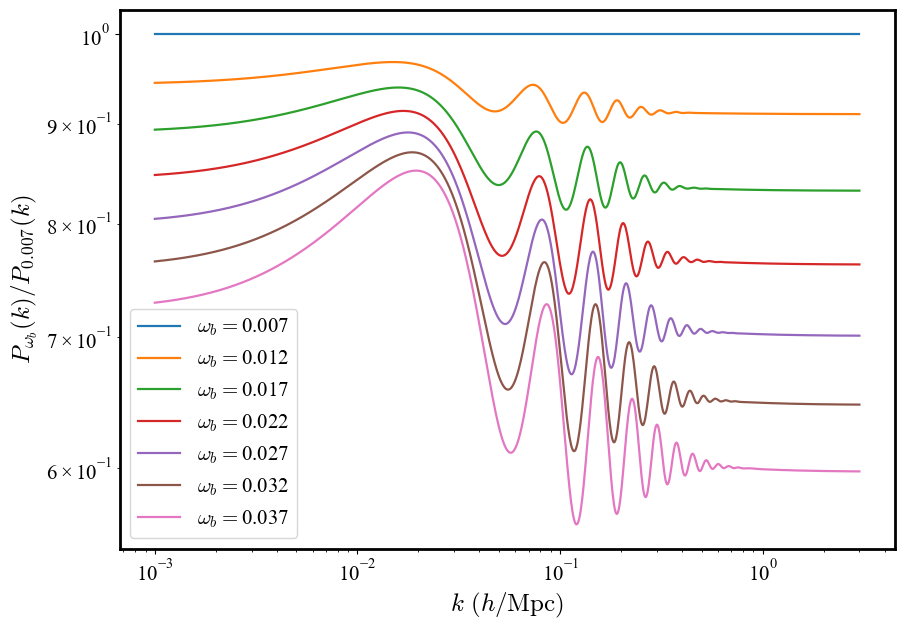

In [3]:
df2 = pd.read_csv('PK_O_B.csv')
k = df2['k']
P = df2['P_k_om_b']
a = len(omega_b_arr)
b = len(k)
alpha = int(b/a)
#colors = ['darkred','k','darkgreen','darkviolet','b','darkorange','cyan']

for i in range(a):
    x = k[i * alpha:(i + 1) * alpha]
    y = P[i * alpha:(i + 1) * alpha]
    string = r'$\omega_{b}=$' + str(round(omega_b_arr[i], 3))
    plt.loglog(x,y,label=string)
    plt.xlabel(r"$k \ (h / \mathrm{Mpc})$")
    plt.ylabel(r'$P_{\omega_b}(k)/P_{0.007}(k)$')
    plt.legend()
plt.savefig('plot1.pdf')

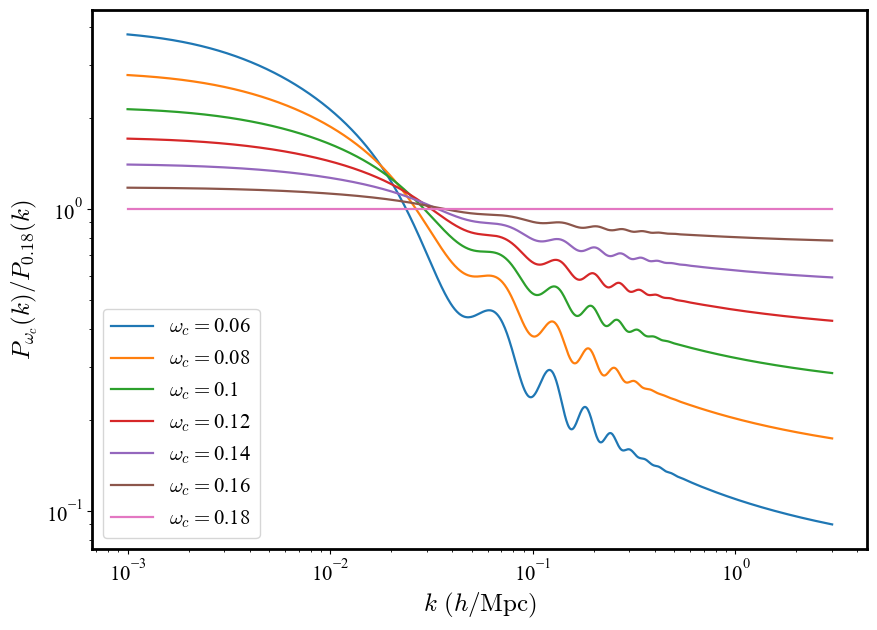

In [4]:
df2 = pd.read_csv('PK_O_M.csv')
k = df2['k']
P = df2['P_k_om_m']
a = len(omega_b_arr)
b = len(k)
alpha = int(b/a)
#colors = ['darkred','k','darkgreen','darkviolet','b','darkorange','cyan']

for i in range(a):
    x = k[i * alpha:(i + 1) * alpha]
    y = P[i * alpha:(i + 1) * alpha]
    string = r'$\omega_{c}=$' + str(round(omega_c_arr[i], 3))
    plt.loglog(x,y,label=string)
    plt.xlabel(r"$k \ (h / \mathrm{Mpc})$")
    plt.ylabel(r'$P_{\omega_c}(k)/P_{0.18}(k)$')
    plt.legend() 
plt.savefig('plot2.pdf') 

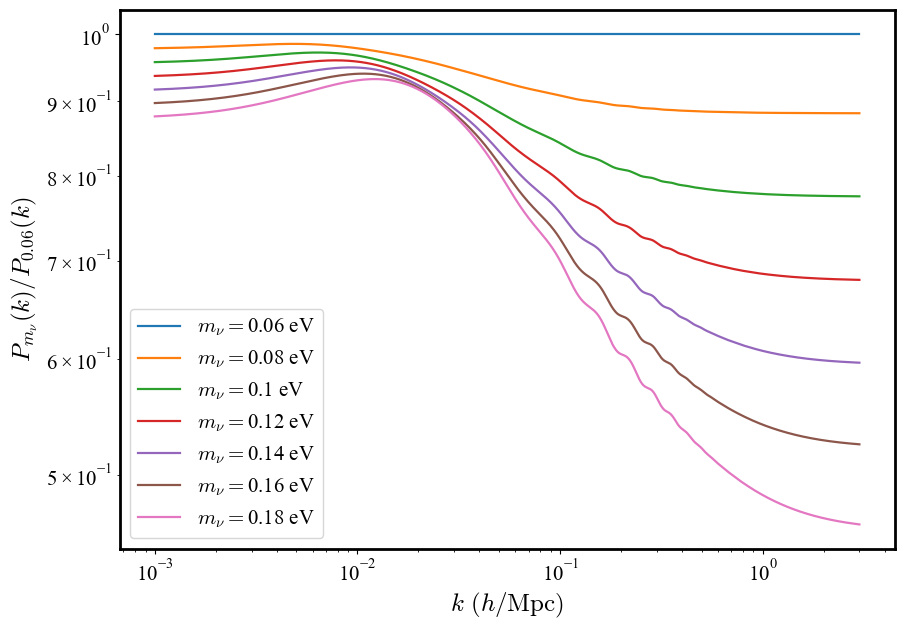

In [5]:
df2 = pd.read_csv('PK_M_NU.csv')
k = df2['k']
P = df2['P_k_M_nu']
a = len(omega_b_arr)
b = len(k)
alpha = int(b/a)
#colors = ['darkred','k','darkgreen','darkviolet','b','darkorange','cyan']

for i in range(a):
    x = k[i * alpha:(i + 1) * alpha]
    y = P[i * alpha:(i + 1) * alpha]
    string = r'$m_{\nu}=$' + str(round(omega_c_arr[i], 3))+r' eV'
    plt.loglog(x,y,label=string)
    plt.xlabel(r"$k \ (h / \mathrm{Mpc})$")
    plt.ylabel(r'$P_{m_{\nu}}(k)/P_{0.06}(k)$')
    plt.legend() 
plt.savefig('plot3.pdf')